# Assignment 3: Train Decision Trees After Data Preparation

In [30]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In this assignment, you will practice the fourth step of the machine learning life cycle and train machine learning models that will be used to solve a classification problem. Namely, you will train decision tree classifiers. You will complete the following tasks:

1. Build your DataFrame and define your ML problem:
    * Load the "cell2cell" data set into a DataFrame
    * Define the label - what are you predicting?
2. Prepare your data:
    * Handle missing data 
    * Perform feature engineering by converting categorical features to one-hot encoded values
    * Identify features
3. Create labeled examples from the data set
4. Split the data into training and test data sets
5. Train two models and evaluate their performances:
    * Fit two Decision Tree classifiers to the training data using different hyperparameter values per classifier
    * Evaluate the accuracy of both model's predictions
    * Plot the resulting accuracy scores
6. Analysis:
   * Experiment with different hyperparameter values: train multiple decision tree classifiers using different hyperparameter values and compare the accuracy scores to find which configuration yields the best performing model.
  

## Part 1. Build Your DataFrame and Define Your ML Problem

#### Load a Data Set and Save it as a Pandas DataFrame

We will work with the "cell2celltrain" data set. This version of the data set will need data preparation before it can be used for modeling.

In [31]:
# Do not remove or edit the line below:
filename = os.path.join(os.getcwd(), "data", "cell2celltrain.csv")

**Task**: Load the data and save it to DataFrame `df`.

In [32]:
df = pd.read_csv(filename, header=0)

####  Inspect the Data

**Task**: Display the shape of `df` -- that is, the number of records (rows) and variables (columns)

In [33]:
df.shape

(51047, 58)

#### Define the Label

Once again, this is a binary classification problem in which we will predict customer churn. The label is the `Churn` column.

#### Identify Features

We will determine the features after we prepare our data in the section below.

## Part 2. Prepare Your Data

You will perform step three of the machine learning life cycle and prepare your data for modeling. You will first clean your data by handling missing values and will then perform feature engineering by transforming categorical features using one-hot encoding.

### a. Identify and Handle Missing Data

**Task**: Check if Dataframe `df` contains missing values, and sum up the resulting values by columns. Save this sum to variable `nan_count`. Print the results.

In [34]:
nan_count = nan_count = df.isnull().sum()
nan_count

CustomerID                       0
Churn                            0
ServiceArea                     24
ChildrenInHH                     0
HandsetRefurbished               0
HandsetWebCapable                0
TruckOwner                       0
RVOwner                          0
HomeownershipKnown               0
BuysViaMailOrder                 0
RespondsToMailOffers             0
OptOutMailings                   0
NonUSTravel                      0
OwnsComputer                     0
HasCreditCard                    0
NewCellphoneUser                 0
NotNewCellphoneUser              0
OwnsMotorcycle                   0
MadeCallToRetentionTeam          0
CreditRating                     0
PrizmCode                        0
Occupation                       0
Married                      19700
MonthlyRevenue                   0
MonthlyMinutes                   0
TotalRecurringCharge             0
DirectorAssistedCalls            0
OverageMinutes                   0
RoamingCalls        

Notice that the `married` column contains many missing values. There are different ways to handle missing values in your data. You have practiced imputing missing values by replacing them with means. Another way to handle missing values is to remove the column that contains these values. In this case, replacing missing values in the `married` column with means doesn't quite make sense since the column contains boolean values, so let's remove the `married` column.

**Task**: Remove the `married` column from DataFrame `df`.

In [35]:
df.drop(columns=['Married'], axis = 1, inplace = True)

The only other column that contains missing values is the `ServiceArea` column. Let's inspect the `ServiceArea` column to get an idea of what kind of values are in this column.

In [36]:
df['ServiceArea']

0        SEAPOR503
1        PITHOM412
2        MILMIL414
3        PITHOM412
4        OKCTUL918
           ...    
51042    LAXSFN818
51043    LAXCDG310
51044    LAXCDG310
51045    NEVPOW619
51046    NEVPOW619
Name: ServiceArea, Length: 51047, dtype: object

In [37]:
df['ServiceArea'].dtype

dtype('O')

**Task**: Note that the `ServiceArea` columns contains string data types. Replace every entry in the column `ServiceArea` that contains a `NaN` value with the string `unavailable`.

In [38]:
df['ServiceArea'].fillna('unavailable', inplace = True)

**Task**: Inspect DataFrame `df` to see the if it still has missing values by once again summing up the missing values by columns.

In [39]:
nan_count = df.isnull().sum()
nan_count

CustomerID                   0
Churn                        0
ServiceArea                  0
ChildrenInHH                 0
HandsetRefurbished           0
HandsetWebCapable            0
TruckOwner                   0
RVOwner                      0
HomeownershipKnown           0
BuysViaMailOrder             0
RespondsToMailOffers         0
OptOutMailings               0
NonUSTravel                  0
OwnsComputer                 0
HasCreditCard                0
NewCellphoneUser             0
NotNewCellphoneUser          0
OwnsMotorcycle               0
MadeCallToRetentionTeam      0
CreditRating                 0
PrizmCode                    0
Occupation                   0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
Unanswer

### b. Perform One-Hot Encoding 

To train a decision tree model, we must first transform the string-valued categorical features into numerical boolean values using one-hot encoding.

#### Find the Columns Containing String Values

In [40]:
df.dtypes

CustomerID                     int64
Churn                           bool
ServiceArea                   object
ChildrenInHH                    bool
HandsetRefurbished              bool
HandsetWebCapable               bool
TruckOwner                      bool
RVOwner                         bool
HomeownershipKnown              bool
BuysViaMailOrder                bool
RespondsToMailOffers            bool
OptOutMailings                  bool
NonUSTravel                     bool
OwnsComputer                    bool
HasCreditCard                   bool
NewCellphoneUser                bool
NotNewCellphoneUser             bool
OwnsMotorcycle                  bool
MadeCallToRetentionTeam         bool
CreditRating                  object
PrizmCode                     object
Occupation                    object
MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
R

**Task**: Find all of the columns whose values are of type 'object' and add the column names to a list named `to_encode`.

In [41]:
to_encode = list(df.select_dtypes(include=['object']).columns)
to_encode

['ServiceArea', 'CreditRating', 'PrizmCode', 'Occupation']

Let's look at the number of unique values each column has:

In [42]:
df[to_encode].nunique()

ServiceArea     748
CreditRating      7
PrizmCode         4
Occupation        8
dtype: int64

Notice that all of the columns except for `ServiceArea` contain a small number of unique values. For these columns, it should be straightforward to use one-hot encoding to replace the column with a set of new binary columns for each unique value. 

However, `ServiceArea` contains a large number of unique values. Let's first deal with the special case of `ServiceArea`.

#### One Hot-Encoding 'ServiceArea': The Top 10 Values

Notice that column `ServiceArea` has 747 potential values. This means we would have to create 747 new binary indicator columns - one column per unique value. That is too many!

Transforming this many categorical values would slow down the computation down the line. One thing we could do is to see if some of the values in `ServiceArea` are occurring frequently. We will then one-hot encode just those frequent values. Let's one-hot encode only the top ten most frequent values in column `ServiceArea`. 

<b>Task</b>: Get the top 10 most frequent values in the `ServiceArea` column and store them in list `top_10_SA`.

<i>Hint:</i> Use Pandas `value_counts()` method to obtain the most frequently occurring values in descending order. Then use the `head()` method to obtain the top ten most frequently occuring values. Finally, extract only the column values and save them to list `top_10_SA`.

In [43]:
top_10_SA = list(df['ServiceArea'].value_counts().head(10).index)

top_10_SA

['NYCBRO917',
 'HOUHOU281',
 'DALDAL214',
 'NYCMAN917',
 'APCFCH703',
 'DALFTW817',
 'SANSAN210',
 'APCSIL301',
 'SANAUS512',
 'SFROAK510']

Now that we have obtained the ten most frequent values for `ServiceArea`, let's use one-hot encoding to transform DataFrame `df` to represent these values numerically.

<b>Task</b>: Write a `for` loop that loops through every value in `top_10_SA` and creates one-hot encoded columns, titled <br>'ServiceArea' + '\_' + $<$service area value$>$'. For example, there will be a column named  `ServiceArea_DALDAL214`. 

Each of these new ten columns will have a value of either 0 or 1. 1 means that the row in question had that corresponding value present in the original `ServiceArea` column.  For example, row 47 in DataFrame `df` originally had the value `DALDAL214` in column `ServiceArea`. After one-hot encoding, row 47 will have the value of 1 in new column `ServiceArea_DALDAL214`.
    
Use the NumPy `np.where()`function  to accomplish this.

In [44]:
for value in top_10_SA:
    
    ## Create columns and their values
    df['ServiceArea_'+ value] = np.where(df['ServiceArea']==value,1,0)

<b>Task</b>: 
1. Drop the original, multi-valued `ServiceArea` column from the DataFrame `df`. 
2. Remove 'ServiceArea' from the `to_encode` list.

In [45]:
df.drop(columns = 'ServiceArea', inplace=True)
to_encode.remove('ServiceArea')

Inspect DataFrame `df` and see the new columns and their values.

In [46]:
df.columns

Index(['CustomerID', 'Churn', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'HomeownershipKnown',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'OwnsMotorcycle', 'MadeCallToRetentionTeam',
       'CreditRating', 'PrizmCode', 'Occupation', 'MonthlyRevenue',
       'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls',
       'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes',
       'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls',
       'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls',
       'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut',
       'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls',
       'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets',
       'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
      

In [47]:
df.head()

,CustomerID,Churn,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,HomeownershipKnown,BuysViaMailOrder,RespondsToMailOffers,...,ServiceArea_NYCBRO917,ServiceArea_HOUHOU281,ServiceArea_DALDAL214,ServiceArea_NYCMAN917,ServiceArea_APCFCH703,ServiceArea_DALFTW817,ServiceArea_SANSAN210,ServiceArea_APCSIL301,ServiceArea_SANAUS512,ServiceArea_SFROAK510
0,3000002,True,False,False,True,False,False,True,True,True,...,0,0,0,0,0,0,0,0,0,0
1,3000010,True,True,False,False,False,False,True,True,True,...,0,0,0,0,0,0,0,0,0,0
2,3000014,False,True,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,3000022,False,False,False,True,False,False,True,True,True,...,0,0,0,0,0,0,0,0,0,0
4,3000026,True,False,False,False,False,False,True,True,True,...,0,0,0,0,0,0,0,0,0,0


Let's inspect column `ServiceArea_DALDAL214` in row 47. Remember, it should have a value of 1.

In [48]:
df.loc[47]['ServiceArea_DALDAL214']

1

#### One Hot-Encode all Remaining Columns

All other columns in `to_encode` have reasonably small numbers of unique values, so we are going to simply one-hot encode every unique value of those columns.

<b>Task</b>: In the code cell below, iterate over the column names contained in `to_encode` and one-hot encode these columns. In the loop:
  1. Use the Pandas `pd.get_dummies()` function to one-hot encode the column and save the resulting DataFrame to variable `df_encoded`
  2. Use `df.join` to join DataFrame `df_encoded` with DataFrame `df`


In [49]:
for column in to_encode:
    df_encoded = pd.get_dummies(df[column], prefix=column)
    df = df.join(df_encoded)

In [50]:
df.head()

,CustomerID,Churn,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,HomeownershipKnown,BuysViaMailOrder,RespondsToMailOffers,...,PrizmCode_Suburban,PrizmCode_Town,Occupation_Clerical,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student
0,3000002,True,False,False,True,False,False,True,True,True,...,1,0,0,0,0,0,1,0,0,0
1,3000010,True,True,False,False,False,False,True,True,True,...,1,0,0,0,0,0,1,0,0,0
2,3000014,False,True,False,False,False,False,False,False,False,...,0,1,0,1,0,0,0,0,0,0
3,3000022,False,False,False,True,False,False,True,True,True,...,0,0,0,0,0,1,0,0,0,0
4,3000026,True,False,False,False,False,False,True,True,True,...,0,0,0,0,0,0,1,0,0,0


<b>Task</b>: Remove all the original columns from DataFrame `df`

In [51]:
df.drop(columns=to_encode, inplace=True)
df

,CustomerID,Churn,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,HomeownershipKnown,BuysViaMailOrder,RespondsToMailOffers,...,PrizmCode_Suburban,PrizmCode_Town,Occupation_Clerical,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student
0,3000002,True,False,False,True,False,False,True,True,True,...,1,0,0,0,0,0,1,0,0,0
1,3000010,True,True,False,False,False,False,True,True,True,...,1,0,0,0,0,0,1,0,0,0
2,3000014,False,True,False,False,False,False,False,False,False,...,0,1,0,1,0,0,0,0,0,0
3,3000022,False,False,False,True,False,False,True,True,True,...,0,0,0,0,0,1,0,0,0,0
4,3000026,True,False,False,False,False,False,True,True,True,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,True,False,True,True,False,False,True,True,True,...,1,0,0,0,0,1,0,0,0,0
51043,3399974,False,True,False,True,False,False,True,True,True,...,0,0,0,0,0,1,0,0,0,0
51044,3399978,True,False,False,True,False,False,True,False,False,...,0,0,1,0,0,0,0,0,0,0
51045,3399990,False,True,False,True,False,False,False,False,False,...,0,0,0,0,0,1,0,0,0,0


<b>Task</b>: Check that the data does not contain any missing values. The absence of missing values is necessary for training a Decision Tree model.

In [52]:
df.isnull().values.any()

False

#### Identify Features
Let's inspect the transformed DataFrame `df`. These will be our features.

In [53]:
list(df.loc[:, df.columns != 'Churn'])

['CustomerID',
 'ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'HomeownershipKnown',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'OwnsMotorcycle',
 'MadeCallToRetentionTeam',
 'MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'OverageMinutes',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'DroppedCalls',
 'BlockedCalls',
 'UnansweredCalls',
 'CustomerCareCalls',
 'ThreewayCalls',
 'ReceivedCalls',
 'OutboundCalls',
 'InboundCalls',
 'PeakCallsInOut',
 'OffPeakCallsInOut',
 'DroppedBlockedCalls',
 'CallForwardingCalls',
 'CallWaitingCalls',
 'MonthsInService',
 'UniqueSubs',
 'ActiveSubs',
 'Handsets',
 'HandsetModels',
 'CurrentEquipmentDays',
 'AgeHH1',
 'AgeHH2',
 'RetentionCalls',
 'RetentionOffersAccepted',
 'ReferralsMadeBySubscriber',
 'IncomeGroup',
 'AdjustmentsToCr

## Part 3. Create Labeled Examples from the Data Set 

<b>Task</b>: Create labeled examples from DataFrame `df`. 
In the code cell below carry out the following steps:

* Get the `Churn` column from DataFrame `df` and assign it to the variable `y`. This will be our label.
* Get all other columns from DataFrame `df` and assign them to the variable `X`. These will be our features. 

In [54]:
y = df['Churn'] 
X = df.drop(columns = 'Churn', axis=1)

## Part 4.  Create Training and Test Data Sets

<b>Task</b>: In the code cell below create training and test data sets out of the labeled examples. 

1. Use Scikit-learn's `train_test_split()` function to create the data sets.

2. Specify:
    * A test set that is 30 percent (.30) of the size of the data set.
    * A seed value of '123'. 
    


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

Check that the dimensions of the training and test data sets are what you expected:

In [56]:
print(X_train.shape)
print(X_test.shape)

(35732, 81)
(15315, 81)


## Part 5. Train Decision Tree Classifiers and Evaluate Their Performances

The code cell below contains a shell of a function named `train_test_DT()`. This function should 
1. train a Decision Tree classifier on the training data
2. test the resulting model on the test data
3. compute and return the accuracy score of the resulting predicted class labels on the test data

<b>Task:</b> Complete the function to make it work.

In [74]:
def train_test_DT(X_train, X_test, y_train, y_test, depth, leaf=1, crit='entropy'):
    '''
    Fit a Decision Tree classifier to the training data X_train, y_train.
    Return the accuracy of resulting predictions on the test set.
    Parameters:
        depth := The maximum depth of the tree
        leaf := The minimum number of samples required to be at a leaf node. 
            We have assigned a default value of 1 to the leaf parameter
        crit := The function to be used to measure the quality of a split. 
            We have assigned a default value of 'entropy' to the crit parameter. Note that
            scikit-learn's default value is gini.
    '''
    
     # 1. Create the  Scikit-learn DecisionTreeClassifier model object below and assign to 
        # variable 'model'
    model = DecisionTreeClassifier(criterion = crit, max_depth = depth, min_samples_leaf = leaf)
  

    # 2. Fit the model to the training data below
    model.fit(X_train, y_train) 
   

    # 3. Make predictions on the test data and assign the result to the 
        # variable 'class_label_predictions' below
    class_label_predictions = model.predict(X_test) 
   
  
    # 4. Compute the accuracy and save the result to the variable 'acc_score' below
    acc_score = accuracy_score(y_test, class_label_predictions)
    
     
    return acc_score

#### Train Decision Tree Classifiers Using Different Hyperparameter Values

<b>Task:</b> Complete the code cell below to train two Decision Tree classifiers using your function. Save the resulting accuracy scores to the list `acc`.

Choose the two values for max depth to pass as arguments to your function:
- one with a low value of max depth
- one high value of max depth

Print the max depth and resulting accuracy score.

In [102]:
#depth1 = 3
#depth2 = 10

#max_depth_range = [depth1, depth2]

max_depth_range = [2**i for i in range(4)]  #for part 6 analysis

acc = []

for md in max_depth_range:
    score = train_test_DT(X_train, X_test, y_train, y_test, md, leaf = 1, crit = "entropy")
    print('Max Depth=' + str(md) + ', accuracy score: ' + str(score))
    acc.append(score)

Max Depth=1, accuracy score: 0.7107411034933072
Max Depth=2, accuracy score: 0.7107411034933072
Max Depth=4, accuracy score: 0.7139405811296115
Max Depth=8, accuracy score: 0.7155076722167809


<b>Task</b>: Visualize the results using a `seaborn` lineplot. The x axis should correspond to the depths contained in list `max_depth_range` and the y axis should corrsponds to the accuracy scores contained in the list `acc`.

Consult the online [documentation](https://seaborn.pydata.org/generated/seaborn.lineplot.html) for more information about `seaborn` lineplots.


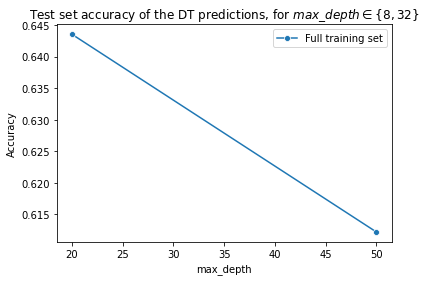

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111)

p = sns.lineplot(x=max_depth_range, y=acc, marker='o', label = 'Full training set')

plt.title('Test set accuracy of the DT predictions, for $max\_depth\in\{8, 32\}$')
ax.set_xlabel('max_depth')
ax.set_ylabel('Accuracy')
plt.show()

## Part 6. Analysis

Experiment with different values for `max_depth`. Add these new values to the list `max_depth_range`, retrain your models and rerun with the visualization cell above. Compare the different accuracy scores.

Once you find the best value for `max_depth`, experiment with different values for `leaf` and compare the different accuracy scores.

Is there one model configuration that yields the best score? Record your findings in the cell below.

To experiment with different values of max_depth, I used the code "max_depth_range = 2 ** i for i in range(12)". This way, I could test multiple depths at once. I found that as the depth increased, the accuracy would go up and then drop back down. This drop would occur after checking depth 4. Every time I ran the code, I noticed that after depth passed 4, the accuracy would reduce. For example, here are some of my calculations:

Max Depth=1, accuracy score: 0.7107411034933072
Max Depth=2, accuracy score: 0.7107411034933072
Max Depth=4, accuracy score: 0.7143323539014038
Max Depth=8, accuracy score: 0.7110675808031341
Max Depth=16, accuracy score: 0.6660137120470128


As you can see, the accuracy lowers after depth 4, so I believe that would yield the best score. Next, I tested different values for leaf. I noticed that as I increased the values for leaf, the accuracy scores would not change too much, but there was a slight change.

For example, when leaf = 1

Max Depth=1, accuracy score: 0.7107411034933072
Max Depth=2, accuracy score: 0.7107411034933072
Max Depth=4, accuracy score: 0.7143323539014038
Max Depth=8, accuracy score: 0.7110022853411688

when leaf = 10

Max Depth=1, accuracy score: 0.7107411034933072
Max Depth=2, accuracy score: 0.7107411034933072
Max Depth=4, accuracy score: 0.7143323539014038
Max Depth=8, accuracy score: 0.7104146261834803

when leaf = 15

Max Depth=1, accuracy score: 0.7107411034933072
Max Depth=2, accuracy score: 0.7107411034933072
Max Depth=4, accuracy score: 0.7144629448253347
Max Depth=8, accuracy score: 0.7093046033300685

In general, the values before max depth = 4 decreased, while 4 and above remained around the same. So, I tried an extremely large number, leaf = 200, the value at max depth = 4 decreased to 0.7139405811296115, which is significant in this context. So, based on this, a lower value for leaf seems better for the model, respective to 4 as the max depth, which I found to be the best depth in the range that I tested.